In [193]:
import scala.io.Source
import util.Random.nextInt
import scala.math.sqrt
import Array._

class Kmeans(var data: List[String], var k: Int,var x:Int = 1 , var y:Int = 2){
    
    var dataF = selectdata(x,y)
    var prototype :Map[Int,Array[Float]] = Map()
    var cluster :Map[Array[Float],Int] = Map()

    def getP = prototype
    def getcluster = cluster
    def getK = k
    
    
    
    // Initialise les prototypes avec une valeurs de data choisi au hasard
    
    def initproto(){
        var temp=selectdata(x,y)
        for(i <- 0 to k-1){
            var alea = nextInt(temp.length)
            prototype += (i -> temp(alea)) 
            temp.take(alea)
            }
    }
    
    
            
    // Retourne une matrice avec toutes les valeurs de data
    /*
    def matrice(): Array[Array[String]]={
        var matrice= ofDim[String](data.length,data(0).length)
        for(i <- 0 to data.length-1){
            if(data(i)!=""){
                var line = data(i).split(",")
                for(j <- 0 to line.length-1 ){
                    matrice(i)(j)=line(j);
                }
            }
        }
        return matrice
        }

    
    
    // Retourne une matrice avec toutes les valeurs de data sauf la derrniere colonne
    
    def matriceFloat(): Array[Array[Float]]={
        var matriceFloat=ofDim[Float](data.length,data(0).length -1)
        for(i <- 0 to data.length-1){
            if(data(i)!=""){
                var line = data(i).split(",")
                for(j <- 0 to line.length-2 ){
                    matriceFloat(i)(j)=line(j).toFloat;
                }
            }
        }
        return matriceFloat
    }
    
    */
    // Retourne la moyenne de chaque variable de data dans un array[Float]
    
    def moyenne():Array[Float]={
        var somme :Float =0
        var moy= ofDim[Float](dataF(0).length)
        for(i<-0 to moy.length -1){
            for(j<-0 to dataF.length-1 ){
                somme+=dataF(j)(i)
                if(j==dataF.length-1){
                    moy(i)=somme/(j+1)
                    somme=0
                }
            }
        }
        return moy

    }
    
    
    
    // Retourne la variance de chaque variable de data dans un array[Float]
    
    def variance():Array[Float]={
        var somme :Float =0
        var variance= ofDim[Float](dataF(0).length)
        var moy = moyenne()
        for(i<-0 to variance.length -1){
            for(j<-0 to dataF.length-1 ){
                somme+=(dataF(j)(i)-moy(i))*(dataF(j)(i)-moy(i))
                if(j==dataF.length-1){
                    variance(i)=somme/(j+1)
                    somme=0
                }
            }
        }
        return variance

    }

    // Retourne l'ecart Type de chaque variable de data dans un array[Float]
    
    def ecartType():Array[Float]={
        var varian = variance()
        var ecartT = ofDim[Float](dataF(0).length)
        for(i<-0 to ecartT.length -1){
            ecartT(i)= sqrt(varian(i)).toFloat
            }
        return ecartT

    }
    
    // Retourne la distance entre 2 Array[Float] en Float
    
    
    def DistEucld(x:Array[Float],y:Array[Float]):Float={
        var somme :Float =0
        for(i<-0 to x.length-1){
            somme+=(x(i)-y(i))*(x(i)-y(i))
            }
        return sqrt(somme).toFloat
    }
    
    
    // Retourne la position de la plus petite distance entre les protypes et les valeurs de la ligne placée en parametre
    
    def minimum (i:Int) :Int={
        var tab :Array[Float]= Array()
            for(j<-0 to k-1){
                tab :+= DistEucld(prototype(j),dataF(i))
            }
            var min=tab(0)
            var pos=0
            for(x<-0 to tab.length-1){
                if(min > tab(x)){
                    min=tab(x)
                    pos=x
                }
                    
            }
        return pos
        
    }
    
    // Remplie le cluster avec les valeurs des variables et des prototypes
    
    def affectation(){
        for(i<-0 to dataF.length-1){
            cluster +=(dataF(i)-> (minimum(i)+1))
        }
        
    }
    
    

    // Retourne la moyenne des tableaux placés en parametre a dans un array[Float]
    
    def moy(donnee :Array[Array[Float]]):Array[Float]={
        var somme :Float =0
        var moy= ofDim[Float](donnee(0).length)
        for(i<-0 to moy.length -1){
            for(j<-0 to donnee.length-1 ){
                somme+=donnee(j)(i)
                if(j==donnee.length-1){
                    moy(i)=somme/(j+1)
                    somme=0
                }
            }
        }
        return moy

    }
    
    //Retourne les valeurs liées au prototype placé en parametre
    
    def groupe(x :Int): Array[Array[Float]]={
        var tab :Array[Array[Float]]=Array() 
        cluster.keys.foreach{key =>
            if(cluster(key)==x+1){
            tab :+= key
            }
        }    
        return tab   
        
    }
    
    //Mets la moyenne des groupes comme valeurs pour les prototypes
    
    def centre(){
        for(i<-0 to k-1){
            prototype+= (i->(moy(groupe(i))))
        }

    }
    
    
    def kmeans(j :Int = 100):Map[Array[Float],Int]={
        initproto()
        affectation()
        for(i<- 0 to  j){
            centre()
            affectation()
        }
        
    return cluster
    }        
      
    
    //Retourne une matrice avec les variables selectionne
    
    def selectdata(x:Int,y:Int): Array[Array[Float]]={
        var matriceFloat=ofDim[Float](data.length,2)
        for(i <- 0 to data.length-1){
            if(data(i)!=""){
                var line = data(i).split(",")
                matriceFloat(i)(0)=line(x-1).toFloat;
                matriceFloat(i)(1)=line(y-1).toFloat;
                
            }
        }
        return matriceFloat
    }
    
    //Retourne un Array[Float] avec toutes les valeurs de la 1er variable
    
    def Valx():Array[Float]={
        var tab :Array[Float]=Array()
         cluster.keys.foreach{key =>
            tab :+=key(0)
            }
        return tab
    }
    
    //Retourne un Array[Float] avec toutes les valeurs de la 2eme variable
    
    def Valy():Array[Float]={
        var tab :Array[Float]=Array()
         cluster.keys.foreach{key =>
            tab :+=key(1)
            }
        return tab
    }
    
    
    //Retourne un Array[Float] avec le numero de groupe de chaque valeurs
    
    def Valk():Array[Float]={
        var tab :Array[Float]=Array()
         cluster.keys.foreach{key =>
            tab :+= cluster(key).toFloat
            }
        return tab
    }
    
    //Retourne un Array[Float] avec toutes 1er variable des prototypes
    
    def ValPx():Array[Float]={
        var tab :Array[Float]=Array()
         getP.keys.foreach{key =>
            tab :+= getP(key)(0)
            }
        return tab
    }
    
    //Retourne un Array[Float] avec toutes 2eme variable des prototypes
    
    def ValPy():Array[Float]={
        var tab :Array[Float]=Array()
         getP.keys.foreach{key =>
            tab :+= getP(key)(1)
            }
        return tab
    }

}

scala.util.Random$@60c61ddc

In [192]:
val data= Source.fromFile("iris.data").getLines().toList
var KM = new Kmeans(data,20,1,2)


//KM moyenne()

//KM variance()

//KM ecartType()


KM initproto;



KM getP


warning:  there were two feature warnings; re-run with -feature for details

1

warning:  there were 5 feature warnings; re-run with -feature for details

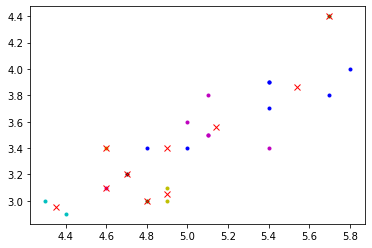

In [170]:

KM kmeans()
beakerx.x = KM Valx;
beakerx.y = KM Valy;
beakerx.k = KM Valk;
beakerx.px = KM ValPx;
beakerx.py = KM ValPy;


%%python
from beakerx.object import beakerx
import numpy as np
import matplotlib.pyplot as plt

colors=["b","g","y","m","k","c"]

taille=len(beakerx.x)

i=0
while i < taille:
    plt.plot(beakerx.x[i], beakerx.y[i], ""+colors[((int(beakerx.k[i])-1)%6)]+".")
    i+=1

i=0
while i < len(beakerx.px):
    plt.plot(beakerx.px[i], beakerx.py[i], "rx")
    i+=1


plt.show()

